In [2]:
import os
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd
import numpy as np

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

Load pickled files

In [4]:
pth = r'\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\L001_diseased_0001.pkl'
with open(pth, 'rb') as f:
    df = pickle.load(f)
    
df.head()

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,...,minor_axis_length,major_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity,r_std,g_std,b_std,slide_num
0,26.0,2546.0,32.755787,23.065393,0.773706,1.346598,16.241785,0.669722,0.755858,1.292480,...,5.672896,7.639109,2838.977539,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0
1,10696.0,2836.0,31.859758,22.474060,0.792664,1.114196,15.853333,0.440997,0.755481,1.261568,...,6.152174,6.854725,2568.238525,157.070007,162.360001,150.309998,18.476179,18.762468,17.544033,1.0
2,7594.0,3174.0,80.244316,32.975887,0.927323,1.223945,13.551229,0.576595,0.775400,1.078373,...,9.195245,11.254475,6230.223633,179.160004,149.800003,174.559998,29.639322,25.206373,29.020210,1.0
3,13996.0,2966.0,168.054489,46.918358,0.959344,1.195339,13.098919,0.547841,0.774833,1.042379,...,13.470244,16.101509,3107.450439,129.470001,89.550003,140.559998,30.121778,21.071230,32.122669,1.0
4,13016.0,3860.0,142.747437,43.225521,0.960059,1.140258,13.089171,0.480500,0.776511,1.041603,...,12.697223,14.478109,2969.409668,147.660004,91.989998,144.320007,31.731400,19.703716,30.633913,1.0


In [5]:
pickled_features_path = r'\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles'
features_list = os.listdir(pickled_features_path)
features_list = sorted([os.path.join(pickled_features_path,f) for k,f in enumerate(features_list) if f.endswith('.pkl')])

In [6]:
from scipy.io import savemat

save df with downsampled/cropped (not cropped here) coordinates as outpth

In [24]:
pix_res = 0.4416

outpth = os.path.join(pickled_features_path,'xy_inds')
if not os.path.exists(outpth):
    os.mkdir(outpth)


for i in range(len(features_list)):
    with open(features_list[i], 'rb') as file:
        features = pickle.load(file)
    
    nm = os.path.basename(features_list[i][:-4])
    
    downsize2_5x = 4/pix_res
    # downsize5x = 2/pix_res

    x_offset = 0
    y_offset = 0
    
    x = features['Centroid_x']
    y = features['Centroid_y']
    
    inds = x.index.tolist()  # save ids
    
    x = (features['Centroid_x'] - y_offset) /downsize2_5x
    y = (features['Centroid_y'] - x_offset) /downsize2_5x
    
    xy_1 = list(zip(x, y))
    
    # xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy_1) if 0 <= x < (crop_d[2] - crop_d[0]) and 0 <= y < (crop_d[3] - crop_d[1])]
    xy_filtered_with_indices = xy_1
    
    inds = [index for index, _ in xy_filtered_with_indices]
    xy = np.array([coordinates for coordinates in xy_filtered_with_indices])
    
    # save adjusted mat xy coords and inds of df
    outfile = os.path.join(outpth, f'{nm}.mat')
    print(outfile)
    savemat(outfile, {'xy': xy, 'inds': inds})

\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0001.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0003.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0005.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0007.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0009.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarDist_9_17_2024_pdac\stardist_feature_df_pickles\xy_inds\L001_diseased_0011.mat
\\10.162.80.16\Andre_expansion\data\Skin Lymphedema\L0001_diseased_150\StarD

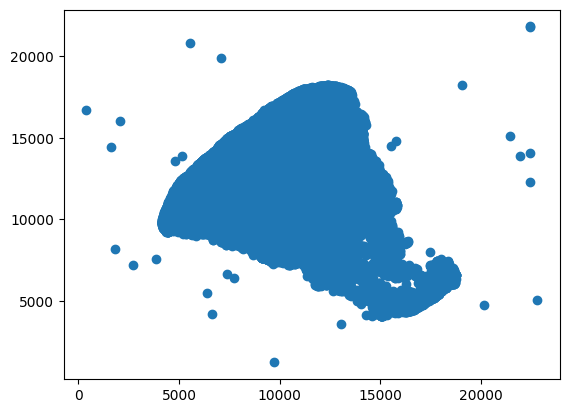

In [25]:
plt.scatter(features['Centroid_x'], features['Centroid_y'])

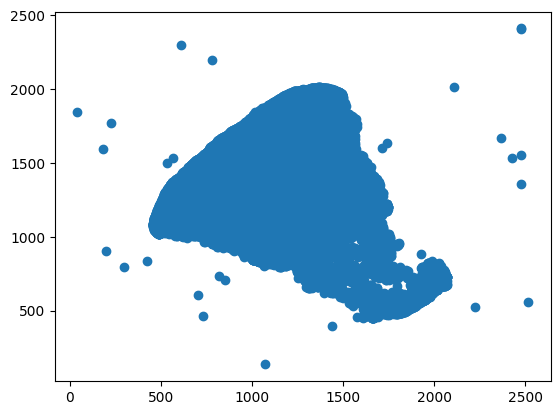

In [26]:
plt.scatter(xy[:,0],xy[:,1])

In [34]:
total = 0
for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    print(key, num)
    total += num
print(total)

0 870
7 0
8 0
9 0
10 0
11 0
13 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
26 0
27 0
28 0
31 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
60 0
61 0
62 0
65 0
66 0
72 0
73 0
74 0
75 0
80 0
82 0
84 0
85 0
86 0
87 0
88 0
89 0
91 0
870


In [48]:
len(xy_class_w_ind)

110691

In [ ]:
len()

C:\Users\Donald\AppData\Local\Temp\ipykernel_40004\3604808688.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])


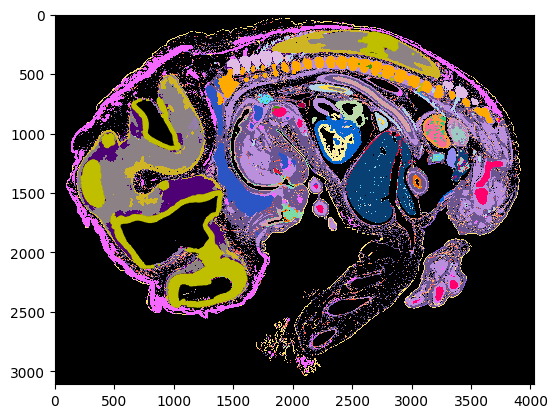

In [46]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')

lab = 18

#xy_class = np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == lab])
xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])

inds_class = [index for index, _ in xy_class_w_ind]
xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])

plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
#plt.gca().invert_yaxis()

plt.show()

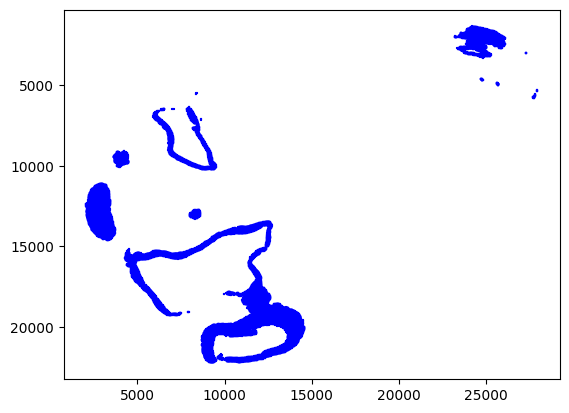

In [47]:
test = features.iloc[inds_class]
plt.scatter(test['Centroid_x'], test['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
features.iloc[inds_class]

In [ ]:
def get_class_inds(label, xy, inds, new_im):
    xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])
    
    inds_class = [index for index, _ in xy_class_w_ind]
    xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])
    
    return inds_class, xy_class

In [ ]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]
plt.scatter(df_18['Centroid_x'], df_18['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
inds_20, xy_20 = get_class_inds(20, xy, inds, new_im)
df_20 = features.iloc[inds_20]
plt.scatter(df_20['Centroid_x'], df_20['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

In [ ]:
ventricular = df_18.drop(columns=['Centroid_x', 'Centroid_y'])
ventricular.dropna(inplace=True)
subventricular = df_20.drop(columns=['Centroid_x', 'Centroid_y'])
subventricular.dropna(inplace=True)

In [ ]:
ventricular.head()

In [ ]:
subventricular.head()

In [ ]:
print(subventricular.columns.tolist())

In [ ]:
plt.figure(figsize=(8, 5))

feature = 'Area'

plt.hist(ventricular[feature], bins=20, color='skyblue', label='Ventricular', edgecolor='black')
plt.hist(subventricular[feature], bins=20, color='salmon', alpha=0.5, label='Subventricular', edgecolor='black')

plt.title(f'Distribution of {feature}')
plt.xlabel(f'{feature}')
plt.ylabel('Frequency')
plt.legend()  
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(ventricular['Area'],ventricular['b_mean_intensity'], label='Ventricular', s=0.1)
plt.scatter(subventricular['Area'],subventricular['b_mean_intensity'], label='Subventricular', s=0.1, c='r')
# plt.legend()  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

In [ ]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]

In [ ]:
for lab in new_labels:
    print(lab)

In [ ]:
df_label_dict = {}  # only with stuff

for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    inds_key, xy_key = get_class_inds(key, xy, inds, new_im)
    df_key = features.iloc[inds_key]
    print(key, num)
    
    # plt.scatter(df_key['Centroid_x'], df_key['Centroid_y'], c='b', marker='+', s=1)
    # plt.gca().invert_yaxis()
    # plt.show()
    
    df_label_dict[key] = df_key

In [ ]:
df_label_dict_1000 = {}  #filter dict such that only classes with over 1000 cells remain
for key, value in df_label_dict.items():
    if len(value) > 1000:
        cls = classes[key]
        print(cls)
        df_label_dict_1000[cls] = value

In [ ]:
print(len(df_label_dict_1000))
print(len(df_label_dict))

In [ ]:
valid_keys

In [ ]:
valid_keys = list(df_label_dict_1000.keys())
key1 = 'bone_Limbs'
key2 = 'bone_Ribs'
test1 = df_label_dict_1000[key1]
test2 = df_label_dict_1000[key2]

plt.scatter(test1['Area'],test1['g_mean_intensity'], label=key1, s=0.5)
plt.scatter(test2['Area'],test2['g_mean_intensity'], label=key2, s=0.5, c='r')
plt.legend(markerscale=10)  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

In [ ]:
plt.scatter(test1['Centroid_x'], test1['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

In [ ]:
noise = ['noise_Noise']  # 0 
adrenal = ['adrenal_Stroma', 'adrenal_Cortex', 'adrenal_FetalZone', 'adrenal_Endothelial', 'adrenal_Cells',
           'adrenal_Noise']  # 1, 2, 3, 4, 5, 6
thymus = ['thymus_Thymus']  # 15
bladder = [
    'bladder_bladder']  # 16  # WRONG, should be bladder = ['Bladder'], there is no bladder in this first try, i messed up
skull = ['skull_skull']

bone = ['bone_ECM', 'bone_Limbs', 'bone_Spine', 'bone_Ribs', 'bone_Notochord', 'bone_Hyoid',
        'bone_Pharyngeal']  # 101, 102, 103, 104, 105, 106, 107
brain = ['brain_Non_tissue', 'brain_Ventricular', 'brain_Stroma', 'brain_Subventricular', 'brain_Marginal_Layer',
         'brain_Intermediate', 'brain_Cortical_Plate', 'brain_Choroid_Plexus', 'brain_Pituitary', 'brain_Neural_Canal',
         'brain_Ganglion', 'brain_Nerve']  # 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212
ear = ['ear_Cochlea', 'ear_Nontissue', 'ear_Nerve', 'ear_Semicircular_Canals',
       'ear_Cochlear_Ducts']  # 301, 302, 303, 304, 305
ecm = ['ecm_Skin_Epithelium', 'ecm_Mesoderm', 'ecm_Blood_Vessels', 'ecm_Noise', 'ecm_Muscle',
       'ecm_Condensed_Mesenchyme']  # 401, 402, 403, 404, 405, 406
eye = ['eye_RPE', 'eye_Outer_retina', 'eye_Inner_retina', 'eye_Lens_epithelium', 'eye_Lens_fibers', 'eye_Nerve',
       'eye_Vasculature', 'eye_Non_tissue', 'eye_ECM', 'eye_BP']  # 501, 502, 503, 504, 505, 506, 507, 508, 509, 510
gi = ['gi_Esophagus', 'gi_Stomach', 'gi_Small_Intestines', 'gi_Large_Intestines', 'gi_ECM', 'gi_Nontissue',
      'gi_Ducts']  # 601, 602, 603, 604, 605, 606, 607
gonads = ['gonads_CondensedMesenchyme', 'gonads_Endothelial', 'gonads_Noise']  # 701, 702, 703
heart = ['heart_Ventricular_Myocardium', 'heart_Atria', 'heart_Trabeculae', 'heart_Valves', 'heart_Large_Vessel',
         'heart_Noise', 'heart_ECM']  # 801, 802, 803, 804, 805, 806, 807
kidney = ['kidney_uretericTree', 'kidney_renalVesicle', 'kidney_condensedMesenchyme', 'kidney_looseStroma',
          'kidney_nonTissue']  # 901, 902, 903, 904, 905
liver = ['liver_blood_vessels', 'liver_Liver_ECM', 'liver_Noise', 'liver_Stroma',
         'liver_Gallbladder']  # 1001, 1002, 1003, 1004, 1005
lungs = ['lungs_bronchioles', 'lungs_vasculature', 'lungs_nontissue', 'lungs_collagen']  # 1101, 1102, 1103, 1104
mesokidney = ['mesokidney_Glomerulus', 'mesokidney_Mesonephric_Tubule', 'mesokidney_Bowman_Capsule',
              'mesokidney_Mesonephric_Duct', 'mesokidney_ECM', 'mesokidney_Paramesonephric_Duct',
              'mesokidney_nontissue']  # 1201, 1202, 1203, 1204, 1205, 1206, 1207
thyroid = ['thyroid_Lobe', 'thyroid_Isthmus', 'thyroid_ECM',
           'thyroid_Noise']  # 1301, 1302, 1303, 1304 # don't have bc I typed [15,16] instead of [15,17], need to run code for 5 hours again now

classes = noise + adrenal + thymus + bladder + skull + bone + brain + ear + ecm + eye + gi + gonads + heart + kidney + liver + lungs + mesokidney + thyroid
print(classes)
print(len(classes))

In [ ]:
for i,j in zip(old_labels, classes):
    print(i, j)

In [ ]:
from sklearn.decomposition import PCA

combined_df = pd.concat([ventricular, bone_limbs], axis=0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
combined_df